In [5]:
import os

from algorithms import *
from snake_environment import *
from states_bracket import *
from DeepDQL import *

In [12]:
# Bracketer
bracketer = FoodDirectionBracket()
# General Settings 
gamma = 0.9
lr_v = 0.15
n_episodes = 10000
epsilon_schedule = Epsilon(eps = 0.3)

Proviamo il QLearning

In [ ]:
# Environment
env = SnakeEnv(render_mode="nonhuman")
Q_p = QLearning(env.action_space.n, gamma=gamma, lr_v=lr_v)
Q_p.learning(env, epsilon_schedule, n_episodes, bracketer)

0
500
1000
1500
2000
2500
3000
3500
4000
4500
5000
5500
6000
6500
7000
7500
8000
8500
9000
9500


In [ ]:
path = "./models/"
name = f"{Q_p.name()} gamma {gamma} lr {lr_v} epsilon {str(epsilon_schedule)} episodes {n_episodes} bracket {str(bracketer)}"
Q_p.save(f"{path}Qlearning gamma {gamma} lr {lr_v} epsilon {str(epsilon_schedule)} episodes {n_episodes}")

In [4]:
env = SnakeEnv(render_mode="human")
path = "./models/"
Q_p = QLearning(env.action_space.n, gamma=gamma, lr_v=lr_v)
Q_p.upload(f"{path}Qlearning gamma {gamma} lr {lr_v} epsilon {epsilon} episodes {n_episodes}")

In [5]:
env = SnakeEnv(render_mode="human")
Q_p.play(env, bracketer)

Proviamo SARSA

In [13]:
# Environment
env = SnakeEnv(render_mode="nonhuman")
SARSA_p = SARSA(env.action_space.n, gamma=gamma, lr_v=lr_v)
SARSA_p.learning(env, epsilon_schedule, n_episodes, bracketer = FoodDirectionBracket())

0
500
1000
1500
2000
2500
3000
3500
4000
4500
5000
5500
6000
6500
7000
7500
8000
8500
9000
9500


In [14]:
path = "./models/"
name = f"{SARSA_p.name()} gamma {gamma} lr {lr_v} epsilon {str(epsilon_schedule)} episodes {n_episodes} bracket {str(bracketer)}"
SARSA_p.save(f"{path}{name}")

In [15]:
SARSA_p.upload(f"{path}{name}")

In [24]:
env = SnakeEnv(render_mode="human", max_step=1000)
SARSA_p.play(env, bracketer)

In [25]:
SARSA_p.print_q_values(bracketer)

State ((ds : 0, de : 1, dn : 1, dw : 0)), Action south : Value -2.617223499220091
State ((ds : 0, de : 1, dn : 1, dw : 0)), Action east : Value -3.5591417211181584
State ((ds : 0, de : 1, dn : 1, dw : 0)), Action north : Value -3.548640935786631
State ((ds : 0, de : 1, dn : 1, dw : 0)), Action west : Value -1.6940354324689322
State ((ds : 0, de : 1, dn : 0, dw : 0)), Action south : Value -3.678109737756577
State ((ds : 0, de : 1, dn : 0, dw : 0)), Action east : Value -4.143858954737382
State ((ds : 0, de : 1, dn : 0, dw : 0)), Action north : Value -2.364983597788979
State ((ds : 0, de : 1, dn : 0, dw : 0)), Action west : Value -2.531840175456429
State ((ds : 1, de : 1, dn : 0, dw : 0)), Action south : Value -3.7612428650315697
State ((ds : 1, de : 1, dn : 0, dw : 0)), Action east : Value -3.3435828299121377
State ((ds : 1, de : 1, dn : 0, dw : 0)), Action north : Value -4.654041390394108
State ((ds : 1, de : 1, dn : 0, dw : 0)), Action west : Value -2.5602004042270163
State ((ds : 0, d

Setting gamma to 0.999 (so having a time horizon of 1000 and a maximum number of steps of 1000) make the agent learn something about how to approach food in order to prevent to end in its own tail.

Proviamo DDQN


In [4]:
BATCH_SIZE = 128
MEMORY_SIZE = 10000
TARGET_UPDATE_FREQ = 200

# Bracketer
bracketer = FoodRelativePositionBracket()
# General Settings
gamma = 0.95
lr_v = 0.001
epsilon = 0.1
n_episodes = 20001

# Environment
env = SnakeEnv(render_mode="nonhuman")
state_dim = bracketer.get_state_dim()

ddqn = DeepDoubleQLearning(
    env.action_space.n,
    state_dim=state_dim,
    gamma=gamma,
    lr_v=lr_v,
    batch_size=BATCH_SIZE,
    memory_size=MEMORY_SIZE,
    target_update_freq=TARGET_UPDATE_FREQ,
    device='cpu'
)

In [5]:
env = SnakeEnv(render_mode="nonhuman")
ddqn.learning(env, epsilon, n_episodes, bracketer)

0
500
1000
1500
2000
2500
3000
3500
4000
4500
5000
5500
6000
6500
7000
7500
8000
8500
9000
9500
10000
10500
11000
11500
12000
12500
13000
13500
14000
14500
15000
15500
16000
16500
17000
17500
18000
18500
19000
19500
20000


In [6]:
current_path = os.getcwd()
model_path = os.path.join(current_path, "models/")
print(f"Model path: {model_path}")

Model path: D:\university\reinforcement\project\models/


In [7]:
ddqn.save(f"{model_path}DDQN gamma {gamma} lr {lr_v} epsilon {epsilon} episodes {n_episodes}")

In [8]:
env = SnakeEnv(render_mode="human")
state_dim = bracketer.get_state_dim()
ddqn = DeepDoubleQLearning(
    env.action_space.n,
    state_dim=state_dim,
    gamma=gamma,
    lr_v=lr_v,
    batch_size=BATCH_SIZE,
    memory_size=MEMORY_SIZE,
    target_update_freq=TARGET_UPDATE_FREQ
)
ddqn.upload(f"{model_path}DDQN gamma {gamma} lr {lr_v} epsilon {epsilon} episodes {n_episodes}")

In [20]:
ddqn.play(env, bracketer)

In [19]:
print("Q values:")
for state, action in ddqn.Qvalues.items():
    print(f"State: {state}, Action: {action}, Value: {ddqn.q_values[(state, action)]}")


Q values:


Monte Carlo

In [15]:
env = SnakeEnv(render_mode="nonhuman")
n_episodes = 5000
MC = Montecarlo(env.action_space.n, gamma=gamma, lr_v=lr_v)

In [16]:
MC.learning(env, epsilon, n_episodes, bracketer)

0


KeyboardInterrupt: 

In [22]:
path = "./models/"
MC.save(f"{path}MC gamma {gamma} lr {lr_v} epsilon {epsilon} episodes {n_episodes}")

In [ ]:
env = SnakeEnv(render_mode="human")
MC = Montecarlo(env.action_space.n, gamma=gamma, lr_v=lr_v)
MC.upload(f"{path}MC gamma {gamma} lr {lr_v} epsilon {epsilon} episodes {n_episodes}")

In [14]:
MC.play(env, bracketer)

Time span =  377.8482596874237
epsilon =  0.01 total steps =  974094
average return with greedy policy= -1002


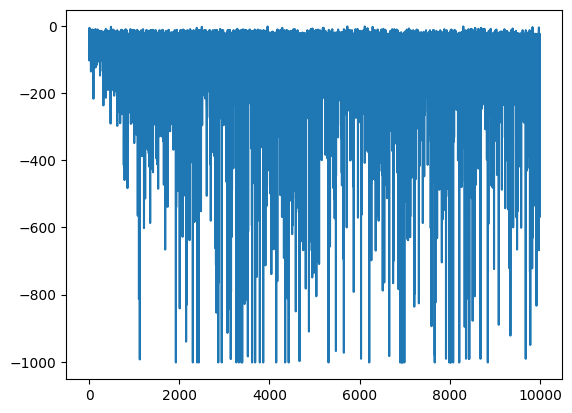

In [18]:
env = SnakeEnv(render_mode="human")

deepDQL = DeepDQL(env, NN)

returns = deepDQL.learnQ(n_traj = 10000, n_traj_for_Qtarget_update=30, batch_size=150)
deepDQL.evaluation_averaged()
plt.plot(returns)
plt.show()